In [1]:
from gurobipy import GRB
import gurobipy as gb


# Maximum difference between inventory positions of the warehouses 
max_diff = 1200

# The supply nodes (i.e., the warehouses)
W = 2

# Creates a list that has the number of units of supply for each supply node
supply = [7000, 8000]

# The demand nodes
B = 7

# Creates a list for the number of units of demand for each demand node
demand = [1000, 1800, 3600, 400, 1400, 2500, 2000]

# Creates a list of lists associated with the costs of each transportation path.
# From warehouse i = {A,B} to bar j = {1,2,3,4,5,6,7}. 
costs = [
         #Bars: 1 2 3 4 5 6 7
         [2.00,4.00,5.00,2.00,1.00,2.50,1.90],#A   Warehouses
         [3.00,1.00,3.00,2.00,3.00,1.75,1.60] #B
        ]

# Instantiate our optimization problem in
model = gb.Model("Linearize Absolute Value Constraint")

#Construct decision variables for each class of decision variables
x = model.addVars(W, B, lb = 0, vtype=GRB.INTEGER, name="Transportation")

# Add the objective function to the optimization problem 
model.setObjective(gb.quicksum(x[w,b]*costs[w][b] for w in range(W) for b in range(B)), GRB.MINIMIZE)

# The demand minimum constraints are added to the milp variable for each demand node (bar)
model.addConstrs(gb.quicksum(x[w,b] for w in range(W)) == demand[b] for b in range(B))

# The supply maximum constraints are added to the milp variable for each supply node (warehouse)
model.addConstrs(gb.quicksum(x[w,b] for b in range(B)) <= supply[w] for w in range(W))
                   
# The absolute value of the difference in the inventory supplied to the bars
# model.addConstr(abs(gb.quicksum(x[0,b] for b in range(B)) - gb.quicksum(x[1,b] for b in range(B)))  <= max_diff)
model.addConstr(gb.quicksum(x[0,b] for b in range(B)) - gb.quicksum(x[1,b] for b in range(B))  <= max_diff)
model.addConstr(gb.quicksum(x[1,b] for b in range(B)) - gb.quicksum(x[0,b] for b in range(B))  <= max_diff)

# Optimally solve the problem
model.optimize()

# Each of the variables is printed with it's resolved optimum value
total_supply = [0,0]
for v in model.getVars():    
    if ("[0," in v.varName):
        total_supply[0] += v.x
    else: 
        total_supply[1] += v.x

# The optimized objective function value is printed to the screen    
print("Total Cost of Transportation = ", model.objVal)
print("Supply from Warehouse A = ", total_supply[0])
print("Supply from Warehouse B = ", total_supply[1])
print("Supply Difference = ", abs(total_supply[0]-total_supply[1]))

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-15
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[x86] - Darwin 22.4.0 22E261)

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 11 rows, 14 columns and 56 nonzeros
Model fingerprint: 0x9f5170e3
Variable types: 0 continuous, 14 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+02, 8e+03]
Found heuristic solution: objective 37975.000000
Presolve removed 9 rows and 7 columns
Presolve time: 0.01s
Presolved: 2 rows, 7 columns, 14 nonzeros
Variable types: 0 continuous, 7 integer (0 binary)
Found heuristic solution: objective 34218.000000

Root relaxation: objective 2.568750e+04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Boun

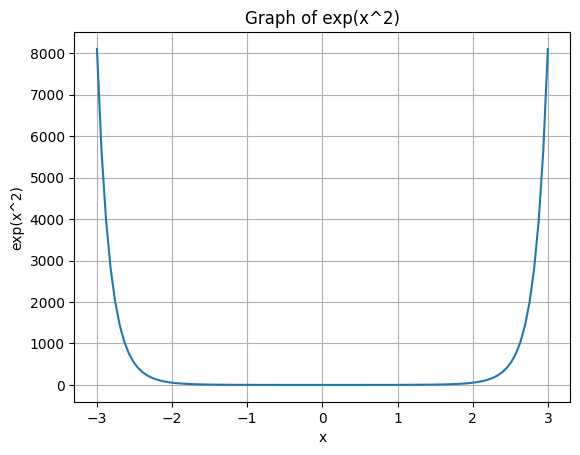

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x的值范围
x = np.linspace(-3, 3, 100)  # 在-3到3之间生成100个点

# 计算函数值
y = np.exp(x**2)

# 绘制图像
plt.plot(x, y)
plt.title("Graph of exp(x^2)")
plt.xlabel("x")
plt.ylabel("exp(x^2)")
plt.grid(True)
plt.show()
